# Question 2

In [ ]:
#BiocManager::install("DESeq2")
#BiocManager::install("vsn")
#BiocManager::install("tximport")
BiocManager::install("tximeta")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.3 (2022-03-10)

Installing package(s) 'tximeta'

installation des dépendances 'rjson', 'GenomicAlignments', 'restfulr', 'Rhtslib', 'assertthat', 'DT', 'BiocIO', 'rtracklayer', 'biomaRt', 'AnnotationFilter', 'Rsamtools', 'ProtGenerics', 'dbplyr', 'filelock', 'interactiveDisplayBase', 'GenomicFeatures', 'ensembldb', 'BiocFileCache', 'AnnotationHub'




In [48]:
#imports
library(readr)
library(tigerstats)
library(ggplot2)
library(gridExtra)
library("DESeq2")
library("vsn")

In [78]:
#load data
cd <- read_tsv("clinical-data.tsv") 
mc <- read_tsv("morphological-counts.tsv")

Rows: 136 Columns: 12
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: "\t"
chr (5): SMPLID, SMPTHNTS, COHORT, SUBJID, IMGURL
dbl (7): SEX, AGE, HGHT, WGHT, BMI, TRISCHD, DTHHRDY

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 136 Columns: 65
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: "\t"
chr  (1): SMPLID
dbl (64): Mophological.cluster.0, Mophological.cluster.1, Mophological.clust...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [79]:
#pour la suite c'est plus simple d'enlever la première colonne avec les noms de gènes et de ne garder que celles 
#avec des nombres
nrow(mc)
mc <- mc[,2:65]

[1] 136

[1] "Mophological.cluster.0"  "Mophological.cluster.1" 
 [3] "Mophological.cluster.2"  "Mophological.cluster.3" 
 [5] "Mophological.cluster.4"  "Mophological.cluster.5" 
 [7] "Mophological.cluster.6"  "Mophological.cluster.7" 
 [9] "Mophological.cluster.8"  "Mophological.cluster.9" 
[11] "Mophological.cluster.10" "Mophological.cluster.11"
[13] "Mophological.cluster.12" "Mophological.cluster.13"
[15] "Mophological.cluster.14" "Mophological.cluster.15"
[17] "Mophological.cluster.16" "Mophological.cluster.17"
[19] "Mophological.cluster.18" "Mophological.cluster.19"
[21] "Mophological.cluster.20" "Mophological.cluster.21"
[23] "Mophological.cluster.22" "Mophological.cluster.23"
[25] "Mophological.cluster.24" "Mophological.cluster.25"
[27] "Mophological.cluster.26" "Mophological.cluster.27"
[29] "Mophological.cluster.28" "Mophological.cluster.29"
[31] "Mophological.cluster.30" "Mophological.cluster.31"
[33] "Mophological.cluster.32" "Mophological.cluster.33"
[35] "Mophological.cluster.34" "Mophological.cluster.35"
[37] "Mophological.cluster.36" "Mophological.cluster.37"
[39] "Mophological.cluster.38" "Mophological.cluster.39"
[41] "Mophological.cluster.40" "Mophological.cluster.41"
[43] "Mophological.cluster.42" "Mophological.cluster.43"
[45] "Mophological.cluster.44" "Mophological.cluster.45"
[47] "Mophological.cluster.46" "Mophological.cluster.47"
[49] "Mophological.cluster.48" "Mophological.cluster.49"
[51] "Mophological.cluster.50" "Mophological.cluster.51"
[53] "Mophological.cluster.52" "Mophological.cluster.53"
[55] "Mophological.cluster.54" "Mophological.cluster.55"
[57] "Mophological.cluster.56" "Mophological.cluster.57"
[59] "Mophological.cluster.58" "Mophological.cluster.59"
[61] "Mophological.cluster.60" "Mophological.cluster.61"
[63] "Mophological.cluster.62" "Mophological.cluster.63"

## Pré-analyses

### Corrélation moyenne-variance

[1] 0.3793004

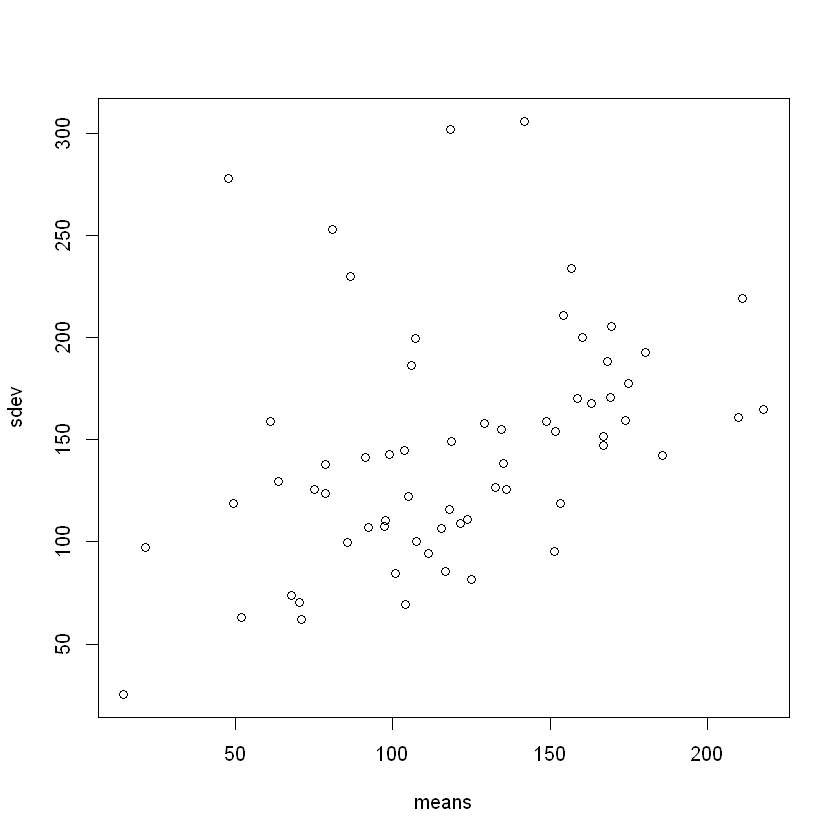

In [80]:
#Dans l'article sur DESseq2 ils parlent du fait qu'avec les rna counts on a une corrélation entre la moyenne de l'expression
#d'un gêne et sa variance, et du coup il vaut mieux faire une normalisation, par exemple pour les pca etc. du coup je voulais
#vérifier si c'est le cas aussi avec les cluster counts mais il semble que non
#après, ça ne veut pas nécessairement dire qu'il ne faut pas quand même faire de normalisation 

means <- colMeans(mc)
sdev <- sapply(mc, sd)

plot(means, sdev)
cor(means, sdev)

Warning message:
"Computation failed in `stat_binhex()`:
"


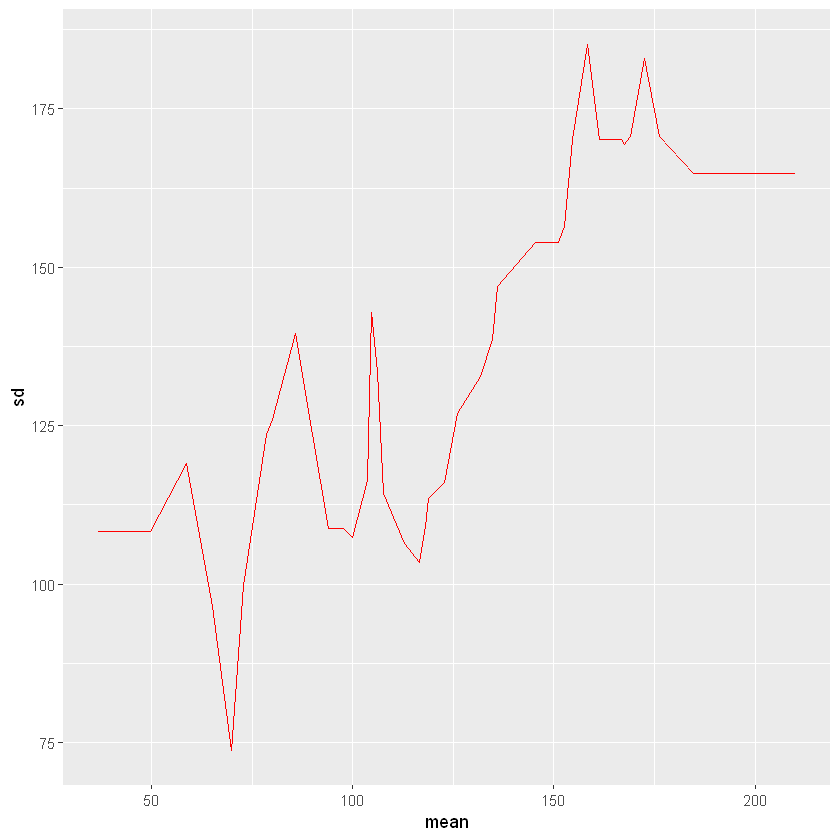

In [81]:
meanSdPlot(t(data.matrix(mc)), ranks=FALSE)

Rows: 56200 Columns: 138
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: "\t"
chr   (2): Name, Description
dbl (136): GTEX-11EM3-0126, GTEX-11EQ9-0626, GTEX-11LCK-0526, GTEX-11NSD-012...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Name,Description,GTEX-11EM3-0126,GTEX-11EQ9-0626,GTEX-11LCK-0526,GTEX-11NSD-0126,GTEX-11O72-2326,GTEX-11P7K-0226,GTEX-11P81-0126,GTEX-11P82-0226,...,GTEX-1QP9N-0126,GTEX-1QPFJ-0626,GTEX-1QW4Y-0226,GTEX-1R9JW-0226,GTEX-1R9PM-0226,GTEX-1RAZA-0826,GTEX-1RAZQ-0926,GTEX-1RAZR-1126,GTEX-1S5ZU-0726,GTEX-1S83E-0726
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000223972.5,DDX11L1,0,1,0,0,0,0,0,3,...,0,0,0,0,0,0,1,0,1,1
ENSG00000227232.5,WASH7P,122,174,85,115,197,263,119,125,...,111,183,124,74,191,251,246,91,169,162
ENSG00000278267.1,MIR6859-1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
ENSG00000243485.5,MIR1302-2HG,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ENSG00000237613.2,FAM138A,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
ENSG00000268020.3,OR4G4P,1,1,1,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,1
ENSG00000240361.1,OR4G11P,1,5,1,0,0,2,1,3,...,0,1,0,0,0,1,0,1,1,1
ENSG00000186092.4,OR4F5,0,1,0,2,1,2,1,1,...,0,0,0,1,0,1,2,7,3,1
ENSG00000238009.6,RP11-34P13.7,3,1,5,3,0,1,3,0,...,0,5,2,0,4,0,0,0,1,0


Warning message:
"Computation failed in `stat_binhex()`:
"


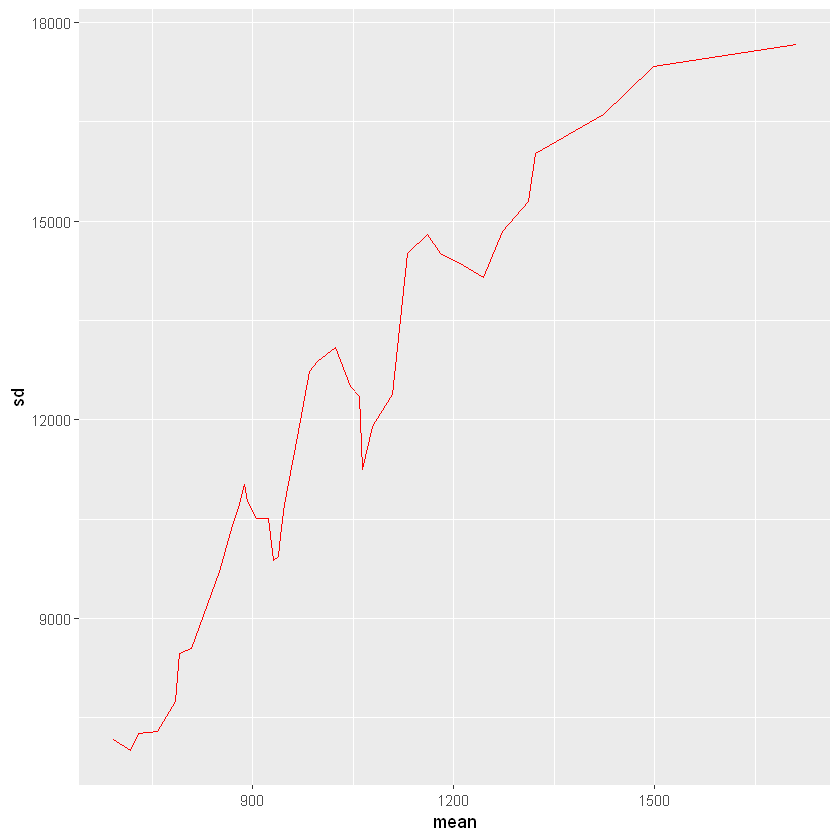

In [77]:
#par comparaison, faisons la même chose avec les rna counts
rna =  read_tsv("RNA-read-counts.tsv")
rna
meanSdPlot(t(data.matrix(rna)), ranks=FALSE)


[1] 0.7956279

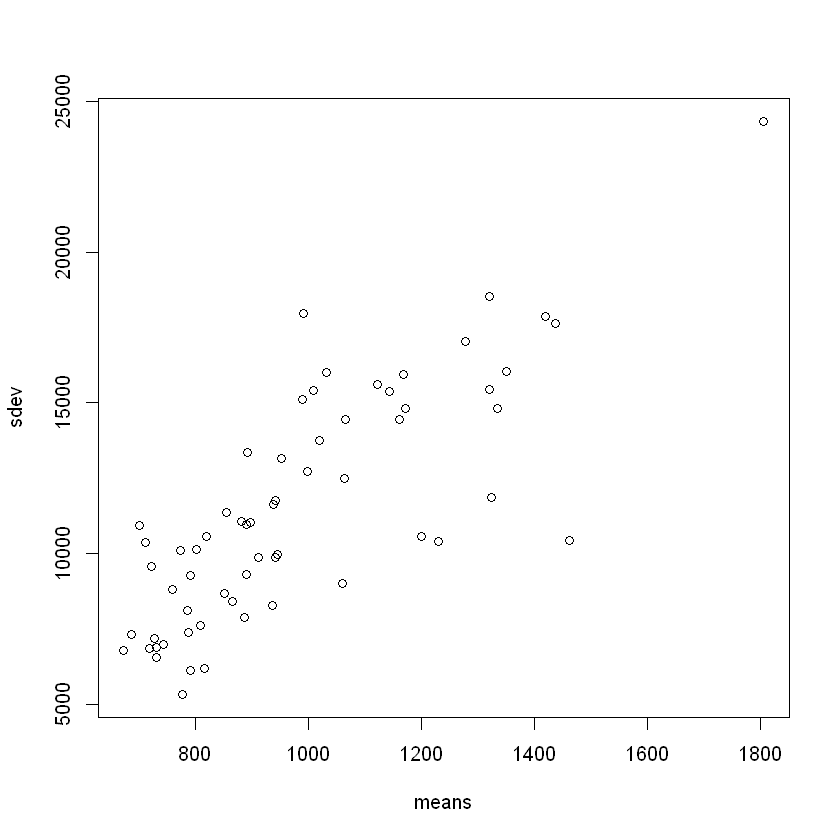

In [72]:
mrna <- rna[,3:65]
means <- colMeans(mrna)
sdev <- sapply(mrna, sd)

plot(means, sdev)
cor(means, sdev)

#on voit que la corrélation est beaucoup plus élevée

### Sample distances

In [88]:
dds = DESeqDataSetFromMatrix(data.matrix(mc),colData=colnames(mc))


ERROR: Error in `rownames<-`(`*tmp*`, value = colnames(countData)): tentative de modification de 'rownames' sur un objet sans dimensions


In [97]:
files <- file.path(dir,"salmon", samples$run, "quant.sf.gz")
names(files) <- samples$run
tx2gene <- read_csv(file.path(dir, "tx2gene.gencode.v27.csv"))

txi <- tximport(files, type="salmon", tx2gene=tx2gene)

library("DESeq2")
ddsTxi <- DESeqDataSetFromTximport(txi,
                                   colData = samples,
                                   design = ~ condition)

ERROR: Error in samples$run: objet de type 'closure' non indiçable


In [99]:
library("tximeta")
se <- tximeta(coldata)

ERROR: Error in library("tximeta"): aucun package nommé 'tximeta' n'est trouvé
